In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
# using command "pip install -U scikit-learn scipy matplotlib"
from sklearn.cluster import KMeans
from sklearn import metrics

import time

def detect_bot_2(maze):
    # Threshold the HSV map image to produce a mask for the robot
    maze_cpy = cv2.cvtColor(maze, cv2.COLOR_BGR2HSV)
    robotMask = cv2.inRange(maze_cpy, np.array([35, 0, 0]), np.array([88, 255, 255]))
    # Process the robot mask to ensure only the filled robot mask remains
    kernel = np.ones((2,2), np.uint8)
    robotMask_erosion = cv2.erode(robotMask, kernel, iterations=2)

    robotHW = np.column_stack(np.where(robotMask_erosion > 0))
    
    # Using a clustering method and the previous array, find the centroid of the robot
    kmeans_model = KMeans(1)
    K = 1
    kmeans_model = KMeans(n_clusters=K).fit(robotHW)
    robotCentre = np.array(kmeans_model.cluster_centers_)
    # Extract the X an Y coordinates of the robot
    x = round(robotCentre[0][0])
    y = round(robotCentre[0][1])

    return cv2.circle(maze,(y, x), 30, (255,0,0),3),(y,x)
def draw_path(mask,image,coordinates,previous):
    if(coordinates[0] == 0 and coordinates[1] == 0):
        mask_copy = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
        image[np.where(mask_copy > 0)] = (0,255,0)
#         image[np.all(mask == (255, 0, 0), axis=-1)] = (0,255,0)
        return mask,image,previous
        
    if(previous[0] == -1 and previous[1] == -1):
        mask = cv2.line(mask,coordinates , coordinates,[255,0,0], 3)
        mask_copy = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
        image[np.where(mask_copy > 0)] = (0,255,0)
#         image[np.all(mask == (255, 0, 0), axis=-1)] = (0,255,0)
        return mask,image,coordinates
    
    
    if(abs((coordinates[0]+coordinates[1]) -(previous[0]+previous[1])) > 20):
        mask = cv2.line(mask, previous, coordinates, [255,0,0], 3)
        mask_copy = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
        image[np.where(mask_copy > 0)] = (0,255,0)
#         image[np.all(mask == (255, 0, 0), axis=-1)] = (0,255,0)
        return mask,image,coordinates
    
    mask_copy = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
    image[np.where(mask_copy > 0)] = (0,255,0)
#     image[np.all(mask == (255, 0, 0), axis=-1)] = (0,255,0)
    
    return mask,image,previous


In [2]:
t = time.time()
vidcap = cv2.VideoCapture('video2.mp4')
success,image = vidcap.read()
count = 0
mask = np.zeros(shape=image.shape, dtype=np.uint8)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
previous =(-1,-1)
img_array = []
while success:

#     if (count >107):
#         for i in range(10):
        success,image = vidcap.read()
#             print(success)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image,coordinates = detect_bot_2(image)       
        mask,image,previous = draw_path(mask,image,coordinates,previous)
        img_array.append(image)
#         plt.figure(figsize = (18, 10))
#         plt.imshow(image)
#         plt.show()
#     else:
#         success,image = vidcap.read()
        
        count += 1
        if count > 1146:  break
    # 10 -> 380
    # 50 = 161
#         print(count)
elapsed = time.time() - t


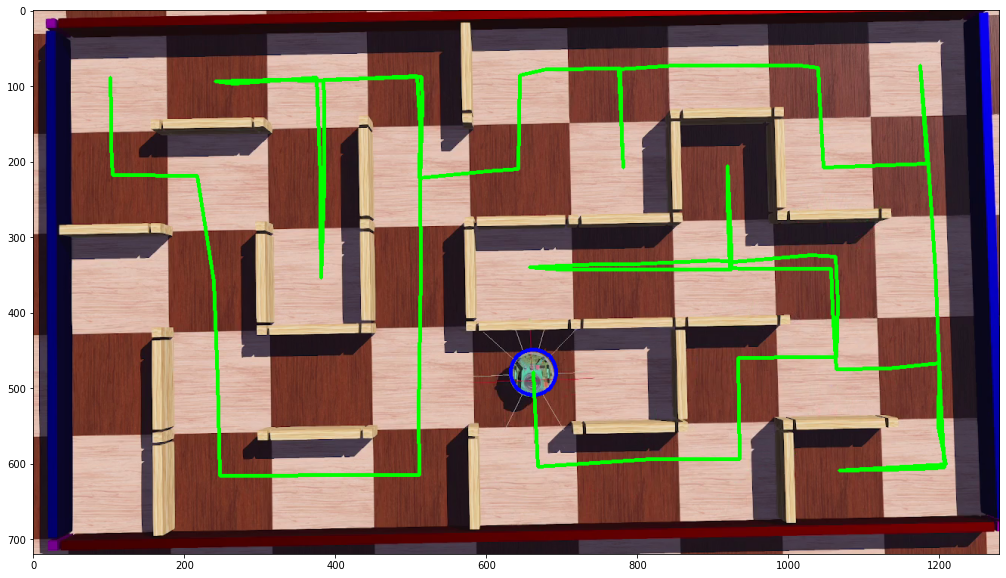

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (18, 10))
plt.imshow(image)
plt.show()

In [4]:
height, width, layers = image.shape
size = (width,height)
out = cv2.VideoWriter('output2.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

print(elapsed)

130.2607581615448
